# FoodWheel: Let the Food Choose For You

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

* What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
* How has the average order amount changed over time? What does this say about the trajectory of the company?
* How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?


Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

Time to get started.

## What cuisines does FoodWheel offer?

The board wants to make sure that FoodWheel offers a wide, diverse, variety of restaurants. Having many different options makes customers more likely to come back. You have been provided with a CSV,`restaurants.csv` , which contains all of the restaurants that partner with FoodWheel.

Let us create pie chart showing the different types of cuisines available on FoodWheel.

***

1. We are going to use pandas and matplotlib for this project. Import both libraries, under their normal names (pd and plt).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

2. Start by loading `restaurants.csv` into a DataFrame called `restaurants`.

In [2]:
restaurants = pd.read_csv('restaurants.csv')

3. Inspect restaurants using `.head()`

In [3]:
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Robertas,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


4. How many different types of cuisine does FoodWheel offer?

    Save this number to the variable `cuisine_options_count`.

In [4]:
cuisine_options_count = restaurants.cuisine.nunique()

cuisine_options_count

8

5. Let us count the number of restaurants of each cuisine. Use `groupby` and `count`. Save your results to `cuisine_counts`.

In [5]:
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()

cuisine_counts

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetari,1
7,Vegetarian,3


***

## What cuisines does FoodWheel offer?

You have generated the following table that counts the number of different restaurants for each cuisine that partner with FoodWheel.

| |cuisine|name|
|:|:------|:---|
|0|American|10|
|1|Chinese|11|
|2|Italian|8|
|3|Japanese|4|
|4|Korean|3|
|5|Pizza|4|
|6|Vegetarian|4| 

****

1. Start by creating two variables:

* `cuisines` contains the values of the column cuisine from `cuisine_counts`.
* `counts` contains the number of restaurants of each cuisine from `cuisine_counts`.

In [6]:
cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values

2. Let us use the values from `counts` to create a pie chart. Make sure that your pie chart includes:

* Labels for each cuisine (i.e, "American", "Chinese", etc.) from `cuisines`
* Percent labels using `autopct`
* A title
* Use `plt.axis` to make the pie chart a perfect circle
* `plt.show()` to display your chart

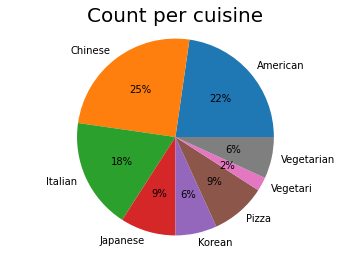

In [7]:
plt.pie(counts,
        labels=cuisines,
        autopct='%d%%')
plt.axis('equal')
plt.title('Count per cuisine', size=20)
plt.show()

***

## Orders Over Time

FoodWheel is a relatively new startup. They launched in April, and have grown more popular since then. Management suspects that the average order size has increased over time. They would like you to investigate if this claim is true and answer these questions:

* How has the average order amount changed over time?
* What does this say about the trajectory of the company?

***

1. Start by loading the data from `orders.csv` into the DataFrame `orders`.

In [8]:
orders = pd.read_csv('orders.csv')

2. Examine the first few rows of orders using `.head()`

In [9]:
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


3. Create a new column in `orders` called `month` that contains the month that the order was placed.

In [10]:
orders['month'] = orders['date'].apply(lambda date: date.split('-')[0])

orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


4. Group `orders` by `month` and get the average order `price` in each `month`. Save your answer to `avg_order`.

In [11]:
avg_order = orders.groupby(['month']).price.mean().reset_index()

avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


5. We are eventually going to make a bar chart with this information. It would be nice if our bar chart had error bars. Calculate the standard deviation for the average `price` of orders for each `month` using `std`. Save this to `std_order`.

In [12]:
std_order = orders.groupby(['month']).price.std().reset_index()

std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


***

## Orders Over Time

You have now created two new DataFrames from the `orders` DataFrame, `avg_order`, which gives the average amount spent on an order for each month and `std_order`, which gives the standard deviation for each month. Now it is time to create a bar chart that uses both of these DataFrames.

***

1. Start by creating a set of axes using `plt.subplot` and saving them to the variable `ax`.

In [13]:
%%capture
ax = plt.subplot()

2. Create a variable with the average prices in it by selecting the column `price` from `avg_order`. Save this to `bar_heights`.

In [14]:
bar_heights = avg_order.price.values

3. Create a variable with the standard deviation of prices in it by selecting the column price from `std_order`. Save this to `bar_errors`.

In [15]:
bar_errors = std_order.price.values

4. Create a bar chart to share this data.

* Create an axes object called `ax` using `plt.subplot`
* The height of each bar should come from `bar_heights`
* Use the standard deviations in `bar_errors` as the `yerr`
* The error capsize should be 5
* Make sure that you label each bar with the name of the month (i.e., 4 = April).
* Also be sure to label the y-axis
* Give your plot a descriptive title

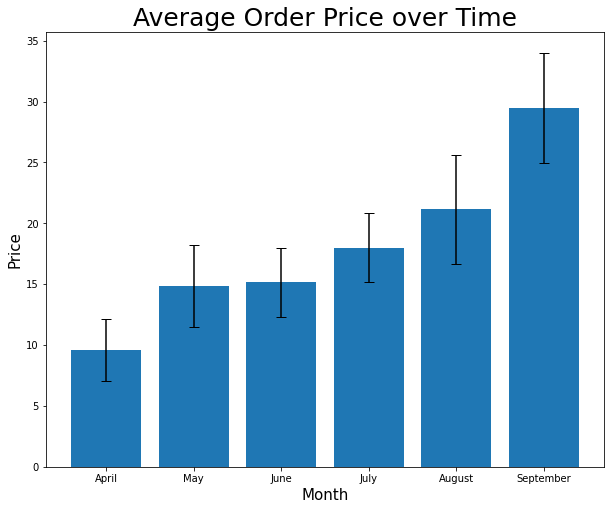

In [16]:
months = avg_order.month.values
month_labels = ['April', 'May', 'June', 'July', 'August', 'September']

plt.figure(figsize=(10,8))
plt.bar(
    range(len(bar_heights)) \
    ,bar_heights \
    ,yerr=bar_errors \
    ,capsize=5)
plt.title("Average Order Price over Time", fontsize=25)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Price", fontsize=15)
ax = plt.subplot()
ax.set_xticks(range(len(months)))
ax.set_xticklabels(month_labels)
plt.show()

***

## Customer Types

There is a range of amounts that customers spend on FoodWheel. Let us investigate and aim to answer our final question:

* How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

A great way to answer this question is to create a histogram of the amount spent by each customer over the past six months.

***

1. Start by grouping `orders` by `customer_id` and calculating the `sum` of `price` spent by each customer. Save your results to `customer_amount`.

In [17]:
customer_amount = orders.groupby(['customer_id']).price.sum().reset_index()

2. Inspect `customer_amount` using `.head()`

In [18]:
customer_amount.head()

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0


3. Create a histogram of this data.

* The range should be from 0 to 200
* The number of bins should be 40
* Label the x-axis `Total Spent`
* Label the y-axis `Number of Customers`
* Add a title

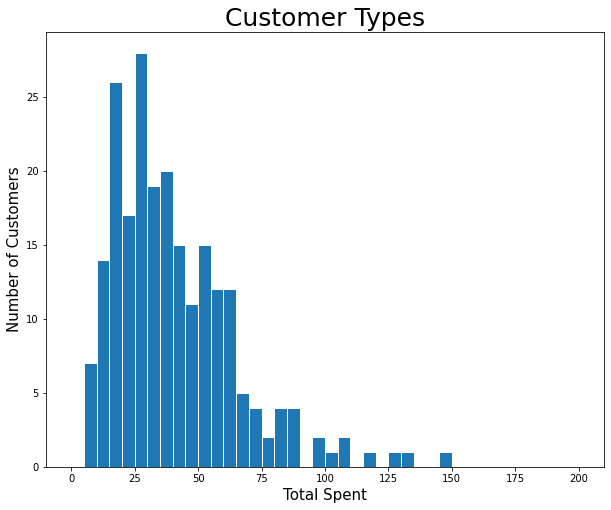

In [19]:
plt.figure(figsize=(10,8))
plt.hist(customer_amount['price'], bins=40, range=[0, 200], edgecolor='white', linewidth=1)
plt.title("Customer Types", fontsize=25)
plt.xlabel("Total Spent", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()